In [7]:
%ds_look
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# imports
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = (12, 6)

# Example: Delivery fleet data

As an example, we'll show how the $K$-means algorithm works with a sample dataset of delivery fleet driver data.  For the sake of simplicity, we'll only be looking at two driver features: mean distance driven per day and the mean percentage of time a driver was $>5$ mph over the speed limit.  In general, this algorithm can be used for any number of features, so long as the number of data samples is much greater than the number of features.

A sample of the data as a `pandas DataFrame` is shown below. 

In [8]:
df=pd.read_csv('data_1024.csv', sep='\t')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


The chart below shows the dataset for 4000 drivers, with the distance feature on the x-axis and speeding feature on the y-axis.  

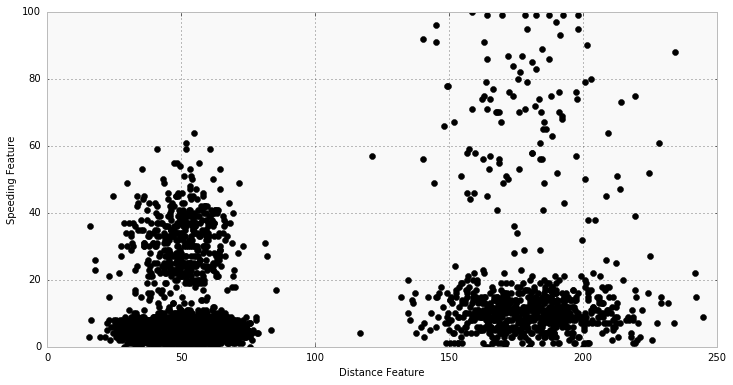

In [9]:
plt.figure()
plt.plot(df.Distance_Feature,df.Speeding_Feature,'ko')
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.ylim(0,100)
plt.show()

We first run the algorithm with K=2, which is the minimum number of clusters that can exist in a dataset.  In this example, we use the Python packages scikit-learn and numpy for computations.

The cluster labels are returned in `kmeans.labels_`. 

In [10]:
from sklearn.cluster import KMeans

### For the purposes of this example, we store feature data from our dataframe `df`, in the `f1` and `f2` arrays. We combine this into a feature matrix `X` before entering it into the algorithm.
f1 = df['Distance_Feature'].values
f2 = df['Speeding_Feature'].values

X=np.matrix(zip(f1,f2))
kmeans = KMeans(n_clusters=2).fit(X)


The chart below shows the results.  Visually, you can see that the K-means algorithm splits the two groups based on the distance feature.  Each cluster centroid is marked with a star.

* Group 1 Centroid = (50, 5.2) 
* Group 2 Centroid = (180.3, 10.5)

Using domain knowledge of the dataset, we can infer that Group 1 is urban drivers and Group 2 is rural drivers.

(50.047634375000001, 8.8287499999999994)
(180.01707500000001, 18.289999999999999)


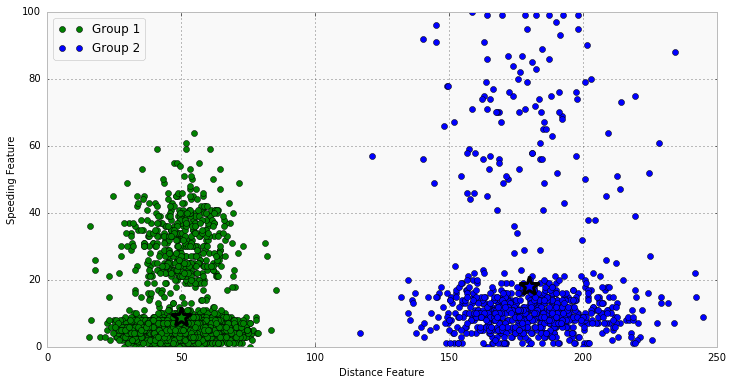

In [11]:
# Plot the results
plt.figure()
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
# print centroid 1
print(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]))
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
# print centroid 2
print(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]))
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')

plt.legend([h1,h2],['Group 1','Group 2'], loc='upper left')
plt.show()

We now want to test how the results look for K=4.  To do this, all that we need to change is the target number of clusters in the `KMeans()` function.

```
kmeans = KMeans(n_clusters=4).fit(X)
```

The chart below shows the resulting clusters.  We see that four distinct groups have been identified by the algorithm, now speeding drivers have been separated from those who follow speed limits along with the rural vs. urban divide.  The threshold for speeding is lower with the urban driver group than for the rural drivers, likely due to urban drivers spending more time in intersections and stop-and-go traffic.

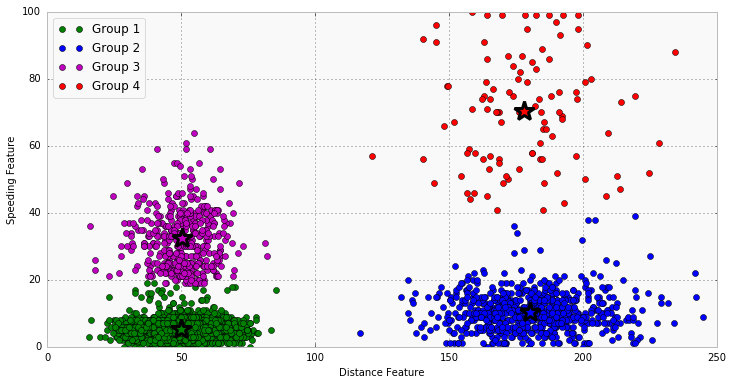

In [12]:
kmeans = KMeans(n_clusters=4).fit(np.matrix(zip(f1,f2)))

# Plot the results
plt.figure()
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
h3,=plt.plot(f1[kmeans.labels_==2],f2[kmeans.labels_==2],'mo')
plt.plot(np.mean(f1[kmeans.labels_==2]),np.mean(f2[kmeans.labels_==2]),'m*',markersize=20,mew=3)
h4,=plt.plot(f1[kmeans.labels_==3],f2[kmeans.labels_==3],'ro')
plt.plot(np.mean(f1[kmeans.labels_==3]),np.mean(f2[kmeans.labels_==3]),'r*',markersize=20,mew=3)
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
plt.show()